# ECS7020P mini-project submission

The mini-project consists of two components:


1.   **Basic solution** [6 marks]: Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).
2.   **Advanced solution** [10 marks]: There are two options. (i) Formulate a machine learning problem that can be attempted using the MLEnd Hums and Whistles dataset and build a solution model. (ii) Create a product that uses the functionality provided by a model trained on the MLEnd Hums and Whistles dataset (e.g. a simple App that predicts the label Harry or StarWars when you hum to it).  

The submission will consist of two Jupyter notebooks, one for the basic solution and another one for advanced solution. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zipped and submitted toghether**.

Each uploaded notebook should consist of: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks will not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa 
import scipy.stats as stats

from sklearn import neighbors
from sklearn.preprocessing import StandardScaler


# 1 Author

**Student Name**:  Cynthia Alfred Saldanha

**Student ID**:  200445151



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

Here, i will be classifying multiple songs based on their genre. In this case, I have manually assigned Genre's to 6 datasets and used supervised machine learning algorithms to classify them. Considering a real world scenario where there are 100's of songs, it'll be a tedious, lengthy and time consuming task to classify each and every song using audio features. This can be reduced if we first train the model to assign a song to a specific genre, in this way we will search for the details of the song in the data-set of the genre the song belongs to. For eg, if we want to identify if a given audio is a Mamma Mia song, in this case, the model would identify the genre of the audio and once identified, it'll classify for the song in that specific genre data-set. There are not a lot of libraries available for genre classification and with further guidance and knowledge we can build a package for genre classification.


# 3 Machine Learning pipeline

Here, i have used pipeline to run two different classifiers for the same model. The first pipeline is for Random Forest classifier. Here, the inputs to the pipeline are as follows : 1) StandardScaler function to scale the features and 2) RandomForestClassifier function to use the random forest classifier model. The pipeline is stored in a variable which can be used to perform various operations. The second pipeline is for the knn classifier. Here, the inputs to the pipeline are as follows : 1) StandardScaler function to scale the features and 2) neighbors function to use the knn classifier model. The pipeline is stored in a variable.The pipeline is stored in a variable which can be used to perform various operations.

For both the pipelines, I used the fit method to train/model the training data-set. Once the model is trained i calculated the score of the model on the test data-set. The ouput of the score method is the accuracy of the model.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
k_values = range(2,12,2)

pipeline_rf_genre = Pipeline([('scaler1_genre', StandardScaler()),
                             ('rand_forest_genre' , RandomForestClassifier(n_estimators = 100))])
pipeline_rf_genre.fit(X_genre_train, Y_genre_train)

print('Model Accuracy for genre classification using RandomForest Classifier : %.3f' % pipeline_rf_genre.score(X_genre_test, 
                                                                                                             Y_genre_test))

Model Accuracy for genre classification using RandomForest Classifier : 0.471


In [13]:
k_values1 = range(2,12,2)

accuracy_t1 = dict.fromkeys(k_values1)
accuracy_v1 = dict.fromkeys(k_values1)

for k1 in k_values1:
    pipeline_knn_genre = Pipeline([('scaler2_genre', StandardScaler()),
                             ('knn_class_genre' , neighbors.KNeighborsClassifier(n_neighbors=k1))])
    pipeline_knn_genre.fit(X_genre_train,Y_genre_train)
    
    y_val_pred1 = pipeline_knn_genre.predict(X_genre_test)
    accuracy_v1[k1] = np.sum(Y_genre_test==y_val_pred1)/len(Y_genre_test)

    # Training accuracy
    y_train_pred1 = pipeline_knn_genre.predict(X_genre_train)
    accuracy_t1[k1] = np.sum(Y_genre_train==y_train_pred1)/len(Y_genre_train)

    print("The training accuracy for k=", k1, "is ", accuracy_t1[k1])
    print("The validation accuracy for k=", k1, "is ", accuracy_v1[k1])
    print("\n")

The training accuracy for k= 2 is  0.7126436781609196
The validation accuracy for k= 2 is  0.40401785714285715


The training accuracy for k= 4 is  0.6340996168582376
The validation accuracy for k= 4 is  0.40625


The training accuracy for k= 6 is  0.5795019157088123
The validation accuracy for k= 6 is  0.4107142857142857


The training accuracy for k= 8 is  0.5517241379310345
The validation accuracy for k= 8 is  0.43080357142857145


The training accuracy for k= 10 is  0.5555555555555556
The validation accuracy for k= 10 is  0.421875




# 4 Transformation stage

A function has been defined for feature extraction. The name of the function is 'getXy'. The input for the function is a data-frame. The function returns two values: X - stores the features for the data-set and Y- stores the labels of the songs. The following features have been used for feature extraction :

1) mfcc - librosa.feature.mfcc(y=y, sr=sr) - returns the envelope of the time power spectrum of the speech signal.'y' stores the value of audio as waveform. 'sr' stores the sampling rate for each sample ( number of samples per second of audio)

2) melspectogram - librosa.feature.melspectrogram(y=y, sr=sr) - returns the power spectrogram (amplitude squared) for each melody over time

3) harmonic - librosa.feature.melspectrogram(data_h, sr=sr) - returns the harmonic(tonal) portions of the signal.

4) percussive - librosa.feature.melspectrogram(data_p, sr=sr) - returns the percussive(transient) portion of the signal.

5) chroma - librosa.feature.chroma_stft(y=data_h, sr=sr) - return an numpy-ndarray of shape(12,T) and each row corresponds to a pitch class (e.g., C, C#, etc.).

6) mfcc_delta -librosa.feature.delta(mfcc) - computes (smoothed) first-order differences among columns of the mfcc input

These features have been selected as they focus on the attributes required for distinguishing the hums for both the songs. As hums have different variations for one song, these features help in obtaining the tempo, pitch and chroma of audio. As the notes and pitches of hums are different for the same song we can use the mean and standard deviation of the given features to get a cetain range of values.

In [8]:
#y stores the value of audio as waveform
# sr stores the sampling rate for each sample ( number of samples per second of audio)

def get_genre_features():
    X_genre_predictor =[]
    Y_genre_label =[]
    temp = []
    
    for i in range(0, len(ml_df)):
    #for i in range(0, 15):
        elements = []
        y, sr = librosa.load(ml_df['path'][i])
        
        yi1 = ml_df['Genre'][i]

        data_h, data_p = librosa.effects.hpss(y)
        spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
        spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
        spec = librosa.feature.melspectrogram(y=y, sr=sr)
        chroma = librosa.feature.chroma_stft(y=data_h, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        mfcc_delta = librosa.feature.delta(mfcc)
       
        elements.append(np.mean(spec_h))
        elements.append(np.mean(spec_p))
        elements.append(np.mean(spec))
        elements.append(np.mean(chroma))
        elements.append(np.mean(mfcc))
        elements.append(np.mean(mfcc_delta))
        
        
        temp.append(elements)
        
        Y_genre_label.append(yi1)
        #Y_genre_label.append(yi2)
    X_genre_predictor = temp
    
    return np.array(X_genre_predictor), np.array(Y_genre_label)


# 5 Modelling

For this data-set i have used 2 models. I have used Knn as this is a multi-class classification and the algorithm has no explicit training step as all the work happens during prediction.Since there is no explicit training step we keep adding new data to the dataset the prediction is adjusted without having to retrain a new model. Random forest uses n-number of decision tree to predict the lables and the prediction which is predicted by most of number of trees is chosen.In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy. Due to these reasons i decided to test/train the data-set between the two models.

1) knn neighbors - K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. There are a number of distance metrics that can be used to calculate the distance between the two points. The default distance metric used is "Minkowski distance" which is a generalization of both the Euclidean distance and the Manhattan distance. 

2) Random Forest Classifier - Random Forest is a supervised machine learning algorithm for classification based on the training data(knowledge of previous experiments). It handles non-linearity by exploiting correlation between the features of data-point/experiment. Random forest splits the training data-set randomly and generates a decision tree for each training data subset. It compares the predictions of all decision trees and chooses the prediction which is predicted by most number of trees. This technique can be useful in improving the efficiency and accuracy of the model.

# 6 Methodology

Function 'getXy' is defined for feature extraction. This function returns two variables, X - stores the features for the data-set and Y- which stores the lables for the features. I have used these two variables to define my test and training data-set. The train_test_split function from the sklearn library helps in splitting the data for training and testing. The training data-set is stored in X_genre_train, y_genre_train variable and testing data-set is stored in X_genre_test, y_genre_test. The train_test_split function has an attribute called size which is set to 0.3 i.e the size of the test data-set will consist of 30% of the original data-set.

Accuracy and confusion matrix have been used as measure to check the efficiency and performance of the model. Confusion matrices are widely used because they give a better idea of a model’s performance than classification accuracy does. For example, in classification accuracy, there is no information about the number of misclassified instances. Imagine that your data has two classes where 85% of the data belongs to class A, and 15% belongs to class B. Also, assume that your classification model correctly classifies all the instances of class A, and misclassifies all the instances of class B. In this case, the model is 85% accurate. However, class B is misclassified, which is undesirable. The confusion matrix, on the other hand, displays the correctly and incorrectly classified instances for all the classes and will, therefore, give a better insight into the performance of your classifier.

Below i have plotted the confusion matrix for both the models i.e random forest classifier and knn to compare the predicted labels with the actual labels. This helps in understanding the count or percentage of features that were misclassified which helps in giving an insight of the performance of classifier. A model can be considered good if it has high True positive and true negative rates and low false positive and false negative rates. 

In the confusion matrix for both the models, the diagonal values represent the correct predictions. The upper and lower part of the diagonal represent the misclassified predictions. In the case of confusion matrix for random forest classifier we see that 14.29% of the data should have been classified as 0 however it was misclassified as 2. This indicates that there is a need for more distant features to classify between the two audio's.

I have also provided the classification report which gives the details of the precision, recall and f1 score of each class.

In [9]:
X_genre_predictor, Y_genre_label= get_genre_features()
X_genre_predictor.shape, Y_genre_label.shape

((1492, 6), (1492,))

In [10]:
from sklearn.model_selection import train_test_split

X_genre_train, X_genre_test, Y_genre_train,Y_genre_test = train_test_split(X_genre_predictor,Y_genre_label, 
                                                                      test_size=0.3,shuffle=True)
X_genre_train.shape,X_genre_test.shape, Y_genre_train.shape,Y_genre_test.shape

((1044, 6), (448, 6), (1044,), (448,))

In [ ]:
# Below is the code for displaying the confusion matrix

Confusion matrix for Random Forest Classifier : 
 [[ 96  19  64]
 [ 35  12  28]
 [ 77  14 103]]


<AxesSubplot:>

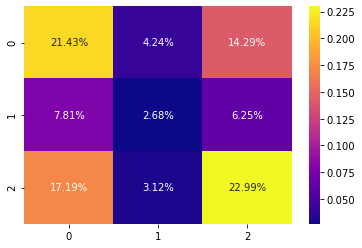

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_rf = pipeline_rf_genre.predict(X_genre_test)

cf_matrix_rf = confusion_matrix(Y_genre_test, y_pred_rf)
print("Confusion matrix for Random Forest Classifier : \n", cf_matrix_rf)

sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, 
            fmt='.2%', cmap='plasma')


In [56]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print(classification_report(Y_genre_test, y_pred_rf))
print(precision_recall_fscore_support(Y_genre_test, y_pred_rf, average='macro'))

              precision    recall  f1-score   support

   Animation       0.46      0.54      0.50       179
         Pop       0.27      0.16      0.20        75
      Sci-Fi       0.53      0.53      0.53       194

    accuracy                           0.47       448
   macro avg       0.42      0.41      0.41       448
weighted avg       0.46      0.47      0.46       448

(0.4188034188034188, 0.4090802280711858, 0.4085623376709644, None)


Confusion matrix for knn Classifier : 
 [[ 99  27  53]
 [ 39  13  23]
 [106  11  77]]


<AxesSubplot:>

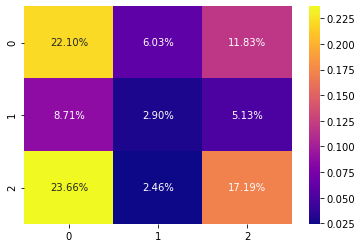

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_knn = pipeline_knn_genre.predict(X_genre_test)

cf_matrix_knn = confusion_matrix(Y_genre_test, y_pred_knn)
print("Confusion matrix for knn Classifier : \n", cf_matrix_knn)

sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_knn), annot=True, 
            fmt='.2%', cmap='plasma')

In [58]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print(classification_report(Y_genre_test, y_pred_knn))
print(precision_recall_fscore_support(Y_genre_test, y_pred_knn, average='macro'))

              precision    recall  f1-score   support

   Animation       0.41      0.55      0.47       179
         Pop       0.25      0.17      0.21        75
      Sci-Fi       0.50      0.40      0.44       194

    accuracy                           0.42       448
   macro avg       0.39      0.37      0.37       448
weighted avg       0.42      0.42      0.41       448

(0.3879692131861852, 0.3744377251755009, 0.3727461157714392, None)


# 7 Dataset

I will be working on 6 data-sets in this project. The 6 datasets are : Potter, StarWars, Hakuna, Mamma, Frozen, Showman

Each data-set consists of hums in audio format for the songs. Since we need to identify if the given audio is a Harry Potter song or a StarWars song, we have used the audio's from their respective data-sets. To get the data-set in a desired format ( for example : 'C:/Masters/ML/MLAssignment/advancedSolution\S100_hum_1_Potter.wav') i have applied the split operation on the data and stored the values in MLENDHW_table variable. The data is now stored in a dataframe (ml_df) for better visualization and to perform various operations. On applying the unique function on the interpretation column, i realized that the data consists of a lot of misspelled names. It was important to clean this particular column as i would be working only the humming part of the dataset.On applying the unique function on the song name, i realized that the data consists of a lot of misspelled names. The song names needed to be unique as i would be assigning genre's for each song. The genre classification for the used data-set is provided below :

Genre is assigned to each song in the 'Genre column'

a) Potter.wav will be represented by 'Sci-Fi' 

b) Starwars.wav will be represented by 'Sci-Fi' 

c) Hakuna.wav will be represented by 'Animation' 

d) Frozen.wav will be represented by 'Animation'

e) Mamma.wav will be represented by 'Pop'

f) Showman.wav will be represented by 'Pop'

The harmonic (which is a feature) for the first file i.e Potter.wav (hum) file has been plotted below. The X-axis represents the time whereas the Y-axis represents the frequency(in dB) class. From the graph we can observe the harmonic frequency of the given audio for a given time. This can help in distinguishing one song from another. 

In [2]:
sample_path = 'C:/Masters/ML/ML Assignment/advancedSolution/*.wav'
files = glob.glob(sample_path)
len(files)

2088

In [3]:
    MLENDHW_table = [] 

    for file in files:
        if(len(file.split('/')[-1].split('_')) == 4):
            file_name = file.split('/')[-1]
            #print(file.split('/')[-1].split('_'))
            participant_ID = file.split('/')[-1].split('_')[0]
            interpretation_type = file.split('/')[-1].split('_')[1]
            interpretation_number = file.split('/')[-1].split('_')[2]
            song = file.split('/')[-1].split('_')[3]
            path = file
            MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song, path])
        elif(len(file.split('/')[-1].split('_')) == 2):
            file_name = file.split('/')[-1]
            #print(file.split('/')[-1].split('_')[1].split(' '))
            participant_ID = file.split('/')[-1].split('_')[0]
            interpretation_type = file.split('/')[-1].split('_')[1].split(' ')[0]
            interpretation_number = file.split('/')[-1].split('_')[1].split(' ')[1]
            song = file.split('/')[-1].split('_')[1].split(' ')[2]
            path = file
            MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song, path])
            #print("in2")
        elif(len(file.split('/')[-1].split('_')) == 3):
            file_name = file.split('/')[-1]
            participant_ID = file.split('/')[-1].split('_')[0]
            interpretation_type = file.split('/')[-1].split('_')[1][:-1]
            interpretation_number = file.split('/')[-1].split('_')[1][-1]
            song = file.split('/')[-1].split('_')[2]
            path = file
            MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song, path])

In [4]:
MLEND_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song','path']).set_index('file_id') 
MLEND_df

,participant,interpretation,number,song,path
file_id,,,,,
advancedSolution\S100_hum_1_Hakuna.wav,advancedSolution\S100,hum,1,Hakuna.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...
advancedSolution\S100_hum_1_Potter.wav,advancedSolution\S100,hum,1,Potter.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...
advancedSolution\S100_hum_2_Frozen.wav,advancedSolution\S100,hum,2,Frozen.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...
advancedSolution\S100_hum_2_Hakuna.wav,advancedSolution\S100,hum,2,Hakuna.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...
advancedSolution\S100_hum_2_Mamma.wav,advancedSolution\S100,hum,2,Mamma.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...
...,...,...,...,...,...
advancedSolution\S9_hum_2_Potter.wav,advancedSolution\S9,hum,2,Potter.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...
advancedSolution\S9_hum_3_Mamma.wav,advancedSolution\S9,hum,3,Mamma.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...
advancedSolution\S9_hum_3_StarWars.wav,advancedSolution\S9,hum,3,StarWars.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...


In [5]:
hum =['Hum','Hun','hum']

ml_df = pd.DataFrame()
for i in range(0,len(MLEND_df)):
    if  MLEND_df['interpretation'][i] in hum:
        MLEND_df['interpretation'][i] = "Hum"
MLEND_df['interpretation'].unique()

ml_df = MLEND_df[MLEND_df['interpretation'] == "Hum"]
ml_df['interpretation'].unique()

array(['Hum'], dtype=object)

In [6]:
ml_df['song'].unique()

potter = ['Potter.wav','harry potter.wav','Potter.WAV','[Potter].wav','Potter .wav','potter.wav','(potter).wav','Potter.Wav',
         'Potter.wav .wav', 'Potter.wav.wav','[potter].wav','harrypotter.wav', '[Potter] .wav', 'Potterwav.wav']
starwars = ['StarWars.wav','Starwars.WAV', 'Starwars.wav','[StarWars].wav','star wars.wav','StarWars.wav.wav', 'Imperial.wav',
           '(starwars).wav','[StarWars] .wav','starwars.wav','[STARWARS].wav','StarWars.Wav','StartWars.wav', 'StarWar.wav',
           '[ Star Wars ].wav','[StatWars].wav', '[Starwars].wav', 'StarsWars.wav', 'Star wars.wav','starwar.wav']
hakuna = ['Hakuna.wav','HakunaMatata.wav', 'hakuna matata.wav', 'Hakuna.WAV','[Hakuna].wav', 'hakuna.wav','HaKuna.wav', 
'[Hakuna] .wav','Hakuna.wav.wav','Hakana.wav','Haknua.wav','[hakuna].wav', 'Hakuna.Wav','[ Hakuna ].wav','[Hukuna].wav' ,
          'hakunamatata.wav']
frozen = ['Frozen.wav','Frozen.WAV', '[Frozen].wav', 'frozen.wav', 'Frozen.wav.wav','(Frozen).wav', '[Frozen] .wav', 
          '[frozen].wav', 'Frozen.Wav', '[ Frozen ].wav', 'letitgo.wav' ]
mamma = ['Mamma.WAV', '[Mamma].wav', 'mamma.wav', 'Mamma.wav','mamamia.wav', '[ Mamma ].wav','Mumma.wav',
         'mummamia.wav', '[Mama].wav', '[mamma].wav']
showman = ['Showman.wav', 'Showman.wav.wav', 'showman.wav','[Showman].wav', 'ThisIsMe.wav', '(Showman).wav', '[Snowman].wav',
       '[showman].wav', 'Showman.Wav',]

for i in range(0,len(ml_df)):
    if ml_df['song'][i] in potter :
        ml_df['song'][i] = "Potter.wav"

for i in range(0,len(ml_df)):
    if ml_df['song'][i] in starwars :
        ml_df['song'][i] = "StarWars.wav"

for i in range(0,len(ml_df)):
    if ml_df['song'][i] in hakuna :
        ml_df['song'][i] = "Hakuna.wav"

for i in range(0,len(ml_df)):
    if ml_df['song'][i] in frozen :
        ml_df['song'][i] = "Frozen.wav"

for i in range(0,len(ml_df)):
    if ml_df['song'][i] in mamma :
        ml_df['song'][i] = "Mamma.wav"
        
for i in range(0,len(ml_df)):
    if ml_df['song'][i] in showman :
        ml_df['song'][i] = "Showman.wav"
        
ml_df['song'].unique()

C:\Users\cynth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


array(['Hakuna.wav', 'Potter.wav', 'Frozen.wav', 'Mamma.wav',
       'StarWars.wav', 'Showman.wav'], dtype=object)

In [7]:
"""
Genre is assigned to each song in the 'Genre column' 
a) Potter.wav will be represented by 'Sci-Fi' 
b) Starwars.wav will be represented by 'Sci-Fi' 
c) Hakuna.wav will be represented by 'Animation' 
d) Frozen.wav will be represented by 'Animation'
e) Mamma.wav will be represented by 'Pop'
f) Showman.wav will be represented by 'Pop'
"""

ml_df['Genre'] = ' '
for i in range(0,len(ml_df)):
    if 'Potter.wav' in ml_df['song'][i] :
        ml_df['Genre'][i] = 'Sci-Fi'
    if 'StarWars.wav' in ml_df['song'][i] :
        ml_df['Genre'][i] = 'Sci-Fi'
    if 'Hakuna.wav' in ml_df['song'][i] :
        ml_df['Genre'][i] = 'Animation'
    if 'Frozen.wav' in ml_df['song'][i] :
        ml_df['Genre'][i] = 'Animation'
    if 'Mamma.wav' in ml_df['song'][i] :
        ml_df['Genre'][i] = 'Pop'
    if 'Showman.wav' in ml_df['song'][i] :
        ml_df['Genre'][i] = 'Pop'

        
ml_df[0:10]


<ipython-input-7-397912e03326>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['Genre'] = ' '


,participant,interpretation,number,song,path,Genre
file_id,,,,,,
advancedSolution\S100_hum_1_Hakuna.wav,advancedSolution\S100,Hum,1,Hakuna.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Animation
advancedSolution\S100_hum_1_Potter.wav,advancedSolution\S100,Hum,1,Potter.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Sci-Fi
advancedSolution\S100_hum_2_Frozen.wav,advancedSolution\S100,Hum,2,Frozen.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Animation
advancedSolution\S100_hum_2_Hakuna.wav,advancedSolution\S100,Hum,2,Hakuna.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Animation
advancedSolution\S100_hum_2_Mamma.wav,advancedSolution\S100,Hum,2,Mamma.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Pop
advancedSolution\S100_hum_2_Potter.wav,advancedSolution\S100,Hum,2,Potter.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Sci-Fi
advancedSolution\S100_hum_3_Mamma.wav,advancedSolution\S100,Hum,3,Mamma.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Pop
advancedSolution\S100_hum_3_StarWars.wav,advancedSolution\S100,Hum,3,StarWars.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Sci-Fi
advancedSolution\S100_hum_4_Frozen.wav,advancedSolution\S100,Hum,4,Frozen.wav,C:/Masters/ML/ML Assignment/advancedSolution\S...,Animation


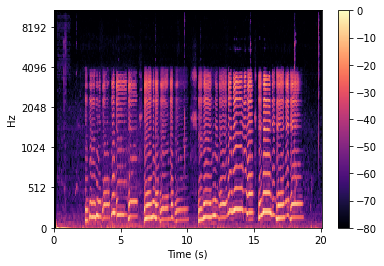

In [18]:
import librosa.display

y, sr = librosa.load(ml_df['path'][0])
data_h, data_p = librosa.effects.hpss(y)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar();

# 8 Results

In this section, I have played with the hyperparameters for the both the models to see which combination would give better results. 

***Random Forest Classifier*** :
I have adjusted the n_estimators (n_estimators indicates the number of decision trees that will be used for the model) value for the random forest classifier and have noted the score respectively. The default value of n_estimators is 100, i have updated the values to 50 and 200 and noted that it decreased the performance of the model. When n_estimators is set to 100 we get the highest accuracy of 0.473.

***knn*** :
For knn (‘k’ in k-NN is the number of nearest neighbors used to classify (or predict in case of continuous variable) a test observation sample), I calculated the score of the model for value of k ranging from 2 to 12 with an interval of 2. Here k is the hyperparameter. From the numerous values of k we can determine that the model works efficently compared to others when k is 8. The accuracy when k = 8 is 0.430

Here, the accuracy for random forest classifier is the highest between both the classifiers.

Therefore, we can conclude that random forest classifier is a better model for the data-set with an accuracy of 0.473.

In [46]:
pipeline_rf1 = Pipeline([('scaler_1', StandardScaler()),('rf1', RandomForestClassifier(n_estimators = 50))])
pipeline_rf1.fit(X_genre_train, Y_genre_train)
print('Model Accuracy using Random Forest Classifier is : %.3f' % pipeline_rf1.score(X_genre_test, Y_genre_test))

Model Accuracy using Random Forest Classifier is : 0.464


In [49]:
pipeline_rf2 = Pipeline([('scaler_2', StandardScaler()),('rf2', RandomForestClassifier(n_estimators = 150))])
pipeline_rf2.fit(X_genre_train, Y_genre_train)
print('Model Accuracy using Random Forest Classifier is : %.3f' % pipeline_rf2.score(X_genre_test, Y_genre_test))   

Model Accuracy using Random Forest Classifier is : 0.460


In [50]:
pipeline_rf3 = Pipeline([('scaler_3', StandardScaler()),('rf3', RandomForestClassifier(n_estimators = 200))])
pipeline_rf3.fit(X_genre_train, Y_genre_train)
print('Model Accuracy using Random Forest Classifier is : %.3f' % pipeline_rf3.score(X_genre_test, Y_genre_test))   

Model Accuracy using Random Forest Classifier is : 0.451


In [55]:
pipeline_rf_genre = Pipeline([('scaler1_genre', StandardScaler()),
                             ('rand_forest_genre' , RandomForestClassifier(n_estimators = 100))])
pipeline_rf_genre.fit(X_genre_train, Y_genre_train)
print('Model Accuracy for genre classification using RandomForest Classifier : %.3f' % pipeline_rf_genre.score(X_genre_test, 
                                                                                                             Y_genre_test))

Model Accuracy for genre classification using RandomForest Classifier : 0.473


In [51]:
k_values1 = range(2,12,2)

accuracy_t1 = dict.fromkeys(k_values1)
accuracy_v1 = dict.fromkeys(k_values1)

for k1 in k_values1:
    pipeline_knn_genre = Pipeline([('scaler2_genre', StandardScaler()),
                             ('knn_class_genre' , neighbors.KNeighborsClassifier(n_neighbors=k1))])
    pipeline_knn_genre.fit(X_genre_train,Y_genre_train)
    
    y_val_pred1 = pipeline_knn_genre.predict(X_genre_test)
    accuracy_v1[k1] = np.sum(Y_genre_test==y_val_pred1)/len(Y_genre_test)

    # Training accuracy
    y_train_pred1 = pipeline_knn_genre.predict(X_genre_train)
    accuracy_t1[k1] = np.sum(Y_genre_train==y_train_pred1)/len(Y_genre_train)

    print("The training accuracy for k=", k1, "is ", accuracy_t1[k1])
    print("The validation accuracy for k=", k1, "is ", accuracy_v1[k1])
    print("\n")

The training accuracy for k= 2 is  0.7126436781609196
The validation accuracy for k= 2 is  0.40401785714285715


The training accuracy for k= 4 is  0.6340996168582376
The validation accuracy for k= 4 is  0.40625


The training accuracy for k= 6 is  0.5795019157088123
The validation accuracy for k= 6 is  0.4107142857142857


The training accuracy for k= 8 is  0.5517241379310345
The validation accuracy for k= 8 is  0.43080357142857145


The training accuracy for k= 10 is  0.5555555555555556
The validation accuracy for k= 10 is  0.421875




# 9 Conclusions

For the given data-set Random Forest Classifier is a better pick for modelling between Random Forest and knn. However, there are many more models like the unsupervised models like knn  or heirarcal clustering that can be used and tested for a better fit. I believe a more deeper knowledge on the features could help in increasing the efficiency and performance of the model. The features i have used are not enough for classifying the audios and more features like Zero-crossing rate, spectral centroid or spectral-roll off can be used to reduce the misclassification. 

The idea here was to implement a multi-label classification model which would take the song-name and genre as labels for classification. On reading about it over the internet i stumbled on Multi-Label Classification with Deep Learning which can be one of the methods for implementing, however as i do have the required knowledge for deep learning, i was a bit hesistant to try this approach. I believe by using multi-label classification, we can classify based on both the genre and song and create a data-set which will have the songs segregated as per the genre.  